In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("Image1.txt")
data.head()

,-3.0002,-3.0379,1
0,-2.56010,-4.00340,1
1,-3.03620,-3.49110,1
2,-3.68670,-1.74540,1
3,-2.88520,-3.37610,1
4,-0.83721,-0.59433,1


In [104]:
np.random.permutation(len(data))
X= data.iloc[:,0:2].values
Y=data.iloc[:,2:3].values
Y.shape

(9999, 1)

In [105]:
y1= Y>1
y=y1.astype(int) 

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [107]:
def sigmoid(z):
    return 1. / (1 + np.exp(-z))

In [108]:
def z(theta, x):
    assert theta.shape[1] == 1
    assert theta.shape[0] == x.shape[1]  # Theta should have as many rows as x has features.
    return np.dot(x, theta)


def hypothesis(theta, x):
    return sigmoid(z(theta, x))


def cost(theta, x, y):
    assert x.shape[1] == theta.shape[0]  # x has a column for each feature, theta has a row for each feature.
    assert x.shape[0] == y.shape[0]  # One row per sample.
    assert y.shape[1] == 1
    assert theta.shape[1] == 1
    h = hypothesis(theta, x)
    one_case = np.matmul(-y.T, np.log(h))
    zero_case = np.matmul(-(1 - y).T, np.log(1 - h))
    return (one_case + zero_case) / len(x)


def gradient_descent(theta, x, y, learning_rate, regularization = 0):
    regularization = theta * regularization
    error = hypothesis(theta, x) - y
    n = (learning_rate / len(x)) * (np.matmul(x.T, error) + regularization)
    return theta - n


def minimize(theta, x, y, iterations, learning_rate, regularization = 0):
    costs = []
    for _ in range(iterations):
        theta = gradient_descent(theta, x, y, learning_rate, regularization)
        costs.append(cost(theta, x, y)[0][0])
    return theta, costs

In [109]:
t=X_train
m=np.size(y_train)
X_train=np.hstack((np.matrix(np.ones(m).reshape(m,1)),t))
candidate = np.zeros(X_train.shape[1]).reshape(X_train.shape[1],1)
theta, costs = minimize(candidate, X_train, y_train, 1500, 0.0005, 0.5)
print(costs[-1])


[[0.09435194]]


In [110]:
t1=X_test
m1=np.size(y_test)
X_test=np.hstack((np.matrix(np.ones(m1).reshape(m1,1)),t1))

In [111]:
from sklearn.linear_model import LogisticRegression
clf1 = LogisticRegression()

In [112]:
clf1.fit(X_train,y_train)

/home/soumya/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [113]:
preds=clf1.predict(X_test)

In [114]:
clf1.score(X_test, y_test)

1.0

In [115]:
X1= data.iloc[:,0:2]
Y1=data.iloc[:,-1]

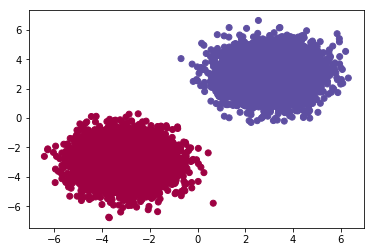

In [116]:
plt.scatter(X[:,0],X[:,1],c=Y1,cmap = plt.cm.Spectral)

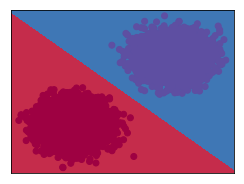

In [117]:
y = y.ravel()
clf1.fit(X,y)
   
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = 0.01
    
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
   
Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Spectral)
    
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
